# Assignment#1 COMP333 Giwon Lee - 40160453

Task: Create a Jupyter notebook using Python code and any of its libraries, 
      but especially pandas, to analyse the data in the csv file for restaurant
      tipping, and to replicate the four plots of the wikipedia article.
      Remember to add the new feature “tip rate”.


Source of the Input I found:
https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv

The Input is separated into 7 parts.
"total_bill","tip","sex","smoker","day","time","size"





# First Histogram with no bins.
Count is nominal and tip is nominal as it does not have natural rank. 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


Text(0, 0.5, 'Count')

<Figure size 432x288 with 0 Axes>

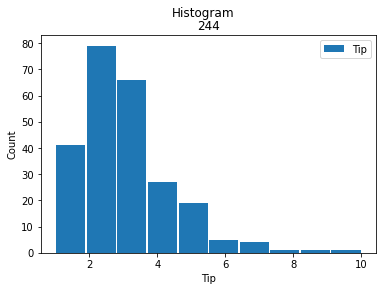

In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
plt.figure()
csv = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
    
data = pd.read_csv(csv)
print(data.head(10))

# data.plot(kind="hist") shows total bill, tip , and size as a histogram.
# data.plot(kind="kde") shows the line of distribution of the histogram. 

df = pd.DataFrame({"Count": len(data), "Tip": data.tip})
df.plot.hist(column=["Tip"], by="Count" ,title="Histogram",rwidth=0.95)

tip_rate = (0.18 - 0.01) *  df.size

plt.xlabel('Tip')
plt.ylabel('Count')


# Second Histogram with bins cover 10 cents increments
Count is ratio since it can be zero, and the tip is categorized as a nominal because there is no natural rank in that group.

<Figure size 432x288 with 0 Axes>

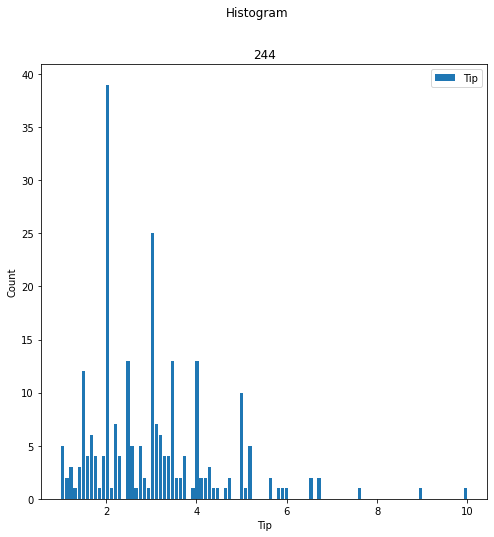

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 


plt.figure()
csv = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
    
data = pd.read_csv(csv)

df = pd.DataFrame({"Count": len(data), "Tip": data.tip})
df.plot.hist(column = ["Tip"], by="Count", figsize=(8, 8),title="Histogram" ,bins = 100, rwidth=0.8)

plt.xlabel('Tip')
plt.ylabel('Count')

plt.show()



# Overall tips based on the Total bill


Text(24.049999999999997, 0.5, 'Tip')

<Figure size 432x288 with 0 Axes>

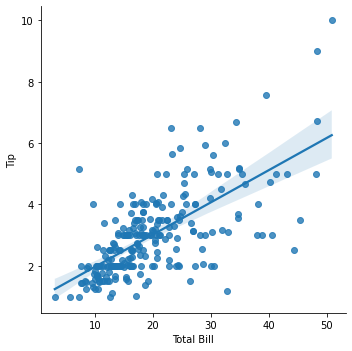

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


plt.figure()
csv = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
    
df = pd.read_csv(csv)

# sns.scatterplot(x= 'total_bill' , y = 'tip',data =df)
# df.plot.scatter(x = 'total_bill', y = 'tip')
sns.lmplot(x ='total_bill', y = 'tip',data = df)
plt.xlabel('Total Bill')
plt.ylabel('Tip')




# Tips: Male VS Female && Smoker VS Non-Smokers
Smokers and female vs male are both nominal described by scatterplots.

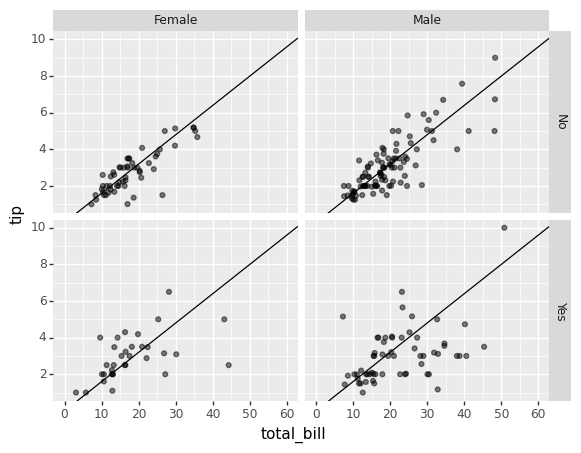

<ggplot: (8781719881304)>

In [2]:
import pandas as pd
import seaborn as sns
import plotnine as p9
from plotnine import *
from plotnine.data import *

csv = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

data = pd.read_csv(csv)
df = pd.DataFrame(data=data)

(p9.ggplot(data=df,
          mapping=p9.aes(x='total_bill',
                         y='tip'))
    + p9.geom_point(alpha=0.5)
    + p9.facet_grid("smoker ~ sex")
    + geom_abline(intercept=0, # set the y-intercept value
                  slope=0.16    # set the slope value
                 )
    + p9.scale_y_continuous(breaks=range(0,12,2))
    + p9.scale_x_continuous(breaks=range(0,70,10),limits=(0,60)) 
)


# Tips rate by the party size

In [1]:
import pandas as pd
import numpy as ns
csv = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
    
df = pd.read_csv(csv)
print(df.head(244))
 
tip_rate = (0.18 - 0.01) *  df.size.mean()
print(df.loc[0:,'size'], df.loc[0:,'tip'])

print("The overall tip rate is ",tip_rate)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64 0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244,